In [91]:
using StableSpectralElements, Plots, LaTeXStrings, LinearAlgebra

In [92]:
p = [i for i in 2:15]

function N_flux(nz_S, nz_C)
    return [0.5*sum(nz_S[m][i] for m in 1:length(nz_S)) + nz_C[i] for i in eachindex(nz_C)]
end

nz_S_tensor = (zeros(14), zeros(14), zeros(14))
nz_C_tensor = zeros(14)
tol = 1e-14
for i in eachindex(p)
    println("p=",p[i])
    approx_type = ModalTensor(p[i])
    ref_approx = ReferenceApproximation(approx_type, Tet())
    D_ξ = reference_derivative_operators(ref_approx.D, ref_approx.reference_mapping)
    S, C = flux_differencing_operators(approx_type, D_ξ, ref_approx.W, 
        ref_approx.R, ref_approx.B)
    nz_S_tensor[1][i] = count(x->abs(x)>tol, Matrix(S[1]))
    nz_S_tensor[2][i] = count(x->abs(x)>tol, Matrix(S[2]))
    nz_S_tensor[3][i] = count(x->abs(x)>tol, Matrix(S[3]))
    nz_C_tensor[i] = count(x->abs(x)>tol, Matrix(C))
end

p=2
p=3
p=4
p=5
p=6
p=7
p=8
p=9
p=10
p=11
p=12
p=13
p=14
p=15


In [93]:
nz_S_multi = (zeros(9), zeros(9), zeros(9))
nz_C_multi = zeros(9)
for i in eachindex(p[1:9])
    println("p=",p[i])
    approx_type = ModalMulti(p[i])
    ref_approx = ReferenceApproximation(approx_type, Tet())
    D_ξ = reference_derivative_operators(ref_approx.D, ref_approx.reference_mapping)
    S, C = flux_differencing_operators(approx_type, D_ξ, ref_approx.W, 
        ref_approx.R, ref_approx.B)
    nz_S_multi[1][i] = count(x->abs(x)>tol, S[1])
    nz_S_multi[2][i] = count(x->abs(x)>tol, S[2])
    nz_S_multi[3][i] = count(x->abs(x)>tol, S[3])
    nz_C_multi[i] = count(x->abs(x)>tol, C)
end

p=2
p=3
p=4
p=5
p=6
p=7
p=8
p=9
p=10


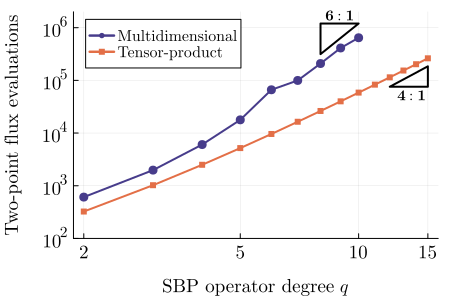

In [99]:
plt = plot(legend=:topleft, xlabel="\nSBP operator degree \$q\$", 
    xscale=:log10, 
    yscale=:log10, 
    ylims=[100,2*10^6], 
    #xlims=[1,16], ylims=[1,6],
    ylabel="Two-point flux evaluations\n", fontfamily="Computer Modern", legendfontsize=10,
    xguidefontsize=12, yguidefontsize=12, xtickfontsize=12, ytickfontsize=12,
    xticks=([2,5,10,15], string.([2,5,10,15])), size=(450,300))
plot!(plt, p[1:9], N_flux(nz_S_multi,nz_C_multi), label="Multidimensional", 
    linestyle=:solid, markershape=:circle, markersize=5, linewidth=2, 
    markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, p, N_flux(nz_S_tensor,nz_C_tensor), label="Tensor-product", 
    linestyle=:solid, markershape=:square, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=2)
r1 = 12
r2 = 15
plot!(plt, [r1, r2, r2, r1], 3.65*[r1^4, r2^4, r1^4, r1^4], label=:none, 
    linewidth=2, color=:black, annotations = ([13.7], [5.2*10^4], L"\mathbf{4:1}", 10))
r1 = 8
r2 = 10
plot!(plt, [r1, r1, r2, r1], 1.2*[r1^6, r2^6, r2^6, r1^6], label=:none, 
    linewidth=2, color=:black, annotations = ([9], [1.7*10^6], L"\mathbf{6:1}", 10))

In [100]:
savefig(plt, "../plots/euler/efficiency/euler_num_fluxes_tet.pdf")

"/Users/tristanmontoya/Research/ReproduceEntropyStableDSEM/plots/euler/efficiency/euler_num_fluxes_tet.pdf"

In [96]:
hcat(p[1:9], N_flux(nz_S_multi,nz_C_multi) ./ N_flux(nz_S_tensor,nz_C_tensor)[1:9])

9×2 Matrix{Float64}:
  2.0   1.87963
  3.0   1.93359
  4.0   2.4192
  5.0   3.43711
  6.0   6.89983
  7.0   6.08215
  8.0   7.95138
  9.0  10.2947
 10.0  10.9946